In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
data=pd.read_csv('player_retention_sample.csv')

In [13]:
data.head()

,player_id,session_count,last_active_days,total_spent,churn
0,1,103,23,348.017366,0
1,2,436,11,471.071241,1
2,3,349,15,89.559642,0
3,4,271,22,51.629405,0
4,5,107,39,26.043953,0


In [15]:
data.isnull().sum()

player_id           0
session_count       0
last_active_days    0
total_spent         0
churn               0
dtype: int64

In [17]:
del data['player_id']

In [29]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)


array([[-0.98994537, -0.89564396, -0.813345  ],
       [ 0.64902122, -0.20055491, -0.4382403 ],
       [ 1.024039  ,  0.49453414,  1.44231655],
       ...,
       [ 0.26011389,  0.08906552,  0.90369099],
       [ 1.60739999, -1.70658119, -0.57063907],
       [-1.614975  , -1.01149214, -1.22171795]])

In [61]:
from sklearn.linear_model import LogisticRegression

regressor=LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [73]:
y_pred=regressor.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

clf=classification_report(y_test,y_pred)
print("Classification Report :\n", clf)

Accuracy:  0.686
Classification Report :
               precision    recall  f1-score   support

           0       0.69      1.00      0.81      1372
           1       0.00      0.00      0.00       628

    accuracy                           0.69      2000
   macro avg       0.34      0.50      0.41      2000
weighted avg       0.47      0.69      0.56      2000



C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
cm=confusion_matrix(y_test, y_pred)

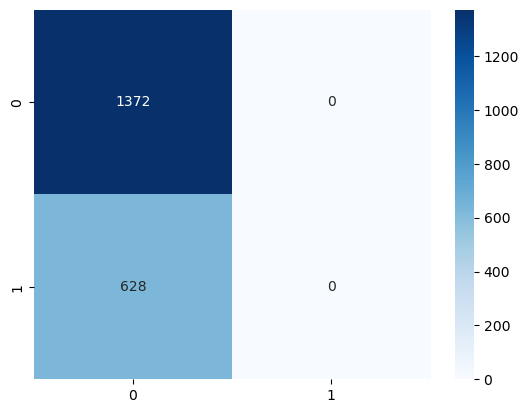

In [99]:
sns.heatmap(cm, fmt='d', annot=True, cmap='Blues')
plt.show()